# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BMCS2123 Natural Language Processing Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Language Processing for Sentiment Analysis : Unveiling Customer Voices of Shopee Reviews and Comments</p>

<p style="text-align:center; ">
<img src="https://bigblue.academy/images/image/blog/sentiment-analysis/group-153.jpg" style='width: 600px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries & Packages</p>

In [1]:
# pip install nltk

In [2]:
# pip install PySastrawi

In [3]:
# pip install pycountry

In [4]:
# pip install Langdetect

In [5]:
# pip install wordcloud

In [6]:
# pip install demoji

In [7]:
# pip install contractions

In [8]:
# pip install tensorflow

In [9]:
# pip install textblob

In [33]:
import pandas as pd
import nltk
import seaborn as sns #Kenneth
import matplotlib.pyplot as plt
import string
import demoji
import contractions
import time

from langdetect import detect,detect_langs #pip install langdetect (Kenneth)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")


#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [8]:
# https://shopee.com.my/Local-seller-T900-Ultra-Smart-Watch-Series-Ultra-Bluetooth-Call-IP67-Waterproof-49mm-Game-i.1111183916.22385838195?sp_atk=a478b61e-90fc-4f85-81fd-2416910e034d&xptdk=a478b61e-90fc-4f85-81fd-2416910e034d
# https://shopee.com.my/T900-Ultra2-Smart-Watch-esture-answering-call-Series-Ultra-Bluetooth-Call-IP65-Waterproof-49mm-Game-G-i.1012188324.25403824010?publish_id=&sp_atk=ebfd4863-ecb6-4394-8b2b-ce3316befc52&xptdk=ebfd4863-ecb6-4394-8b2b-ce3316befc52
# https://shopee.com.my/2023-New-Smart-watch-T10-Ultra-Real-screw-Bluetooth-call-Smart-Watch-Series-8-1-1-ultra-49mm-2.09-Inch-screen-sport-watch-For-Men-And-Women-i.75354798.22475290525?publish_id=&sp_atk=c6cfe054-99b7-4d71-8ec7-6beddfe85fed&xptdk=c6cfe054-99b7-4d71-8ec7-6beddfe85fed 
# https://shopee.com.my/S8-Ultra-Smartwatch-1.99-inch-Display-Screen-KD99-Ultra-45mm-Smart-Watch-8-Tracker-Digital-Heart-Wireless-Charging-i.981124515.22077219973?publish_id=&sp_atk=ad3cc92c-04dd-40b0-926f-74c06b5e4f32&xptdk=ad3cc92c-04dd-40b0-926f-74c06b5e4f32

# Define file paths
data  = "ShopeeComment_1.csv"
data2 = "ShopeeComment_2.csv"
data3 = "ShopeeComment_3.csv"
data4 = "ShopeeComment_4.csv"
data5 = "ShopeeComment_5.csv"

# Read CSV files into DataFrames
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2)
df3 = pd.read_csv(data3)
df4 = pd.read_csv(data4)
df5 = pd.read_csv(data5)

combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

combined_df.to_csv("merged_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [9]:
combined_df.head() # print the data from head

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Version,Oversea Shopping,Region,Picture included,Photos,Videos
0,1,NaN,licheng_2000,11/9/2023 10:59,5,5,5,5,NaN,Black,no,my,yes,https://cf.shopee.vn/file/my-11134103-7r98v-ln...,NaN
1,2,NaN,bangka231,11/10/2023 8:49,5,5,5,5,NaN,Orange,no,my,no,NaN,NaN
2,3,NaN,k*****o,11/13/2023 11:58,5,5,5,5,Performance:ok semua bagus\nQuality:cantik\n\n...,Black,no,my,no,NaN,NaN
3,4,NaN,alisa_natasya,11/15/2023 11:12,5,5,5,5,NaN,Black,no,my,no,NaN,NaN
4,5,NaN,mikesky7,11/21/2023 8:16,5,5,5,5,NaN,Black,no,my,no,NaN,NaN


In [10]:
combined_df.tail() # print the data from head

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Version,Oversea Shopping,Region,Picture included,Photos,Videos
547,86,NaN,asnirulfitri,20/4/2024 1:50,5,5,5,5,Just nice. Overall everything is good. The qua...,Black,no,my,yes,https://cf.shopee.vn/file/my-11134103-7r991-lu...,https://down-cvs-sg.vod.susercontent.com/api/v...
548,87,NaN,nurulbaltrisya,20/4/2024 9:33,5,5,5,5,Quality:good,Black,no,my,no,NaN,NaN
549,88,NaN,fahmibahaudin,20/4/2024 16:07,5,5,5,5,Performance:good\nQuality:good\n\n1.penghantar...,Black,no,my,yes,https://cf.shopee.vn/file/my-11134103-7r98w-lu...,https://down-cvs-sg.vod.susercontent.com/api/v...
550,89,NaN,nazrul_20,20/4/2024 19:49,5,5,5,5,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,Black,no,my,yes,https://cf.shopee.vn/file/my-11134103-7r991-lu...,NaN
551,90,NaN,sayedhasan165,21/4/2024 5:28,1,5,1,5,Performance:very bad\nQuality:worst\n\nYou buy...,Black,no,my,no,NaN,NaN


In [11]:
combined_df[:2].isnull()

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Version,Oversea Shopping,Region,Picture included,Photos,Videos
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               552 non-null    int64  
 1   Unnamed: 1               0 non-null      float64
 2   Author                   550 non-null    object 
 3   Date                     552 non-null    object 
 4   Rating                   552 non-null    int64  
 5   Rating Delivery Service  552 non-null    int64  
 6   Rating Product Quality   552 non-null    int64  
 7   Rating Seller Service    552 non-null    int64  
 8   Review                   412 non-null    object 
 9   Version                  552 non-null    object 
 10  Oversea Shopping         552 non-null    object 
 11  Region                   552 non-null    object 
 12  Picture included         552 non-null    object 
 13  Photos                   264 non-null    object 
 14  Videos                   1

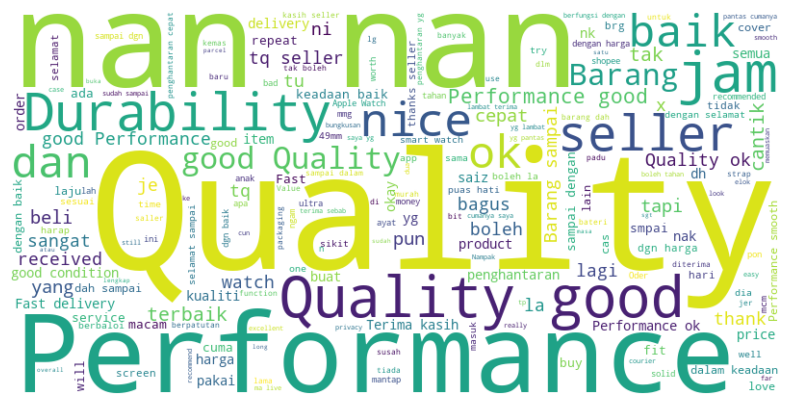

In [13]:
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_df['Review']]
reviews_text = ' '.join(cleaned_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- Lowercase
- Stemming / Lemmatisation
- Stopword Removal
- Normalization
- Text Enrichment (POS Tagging, Augmentation)
- Noice Removal (Remove Emoji)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Transformation</p>

In [14]:
# Get the column variable
combined_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Author', 'Date', 'Rating',
       'Rating Delivery Service', 'Rating Product Quality',
       'Rating Seller Service', 'Review', 'Version', 'Oversea Shopping',
       'Region', 'Picture included', 'Photos', 'Videos'],
      dtype='object')

In [15]:
# Delete the multiple column variables
cols_to_delete = ['Unnamed: 0','Unnamed: 1','Photos','Videos']
combined_clean_df = combined_df.drop(cols_to_delete, axis=1)  # Access column by index

In [16]:
combined_clean_df.columns = ['Author','Date','Rating',
              'Rating Delivery Service','Rating Product Quality','Rating Seller Service',
              'Review','Product Type','Oversea Shopping','Region','Picture Included']

In [17]:
combined_clean_df.head()

,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Product Type,Oversea Shopping,Region,Picture Included
0,licheng_2000,11/9/2023 10:59,5,5,5,5,NaN,Black,no,my,yes
1,bangka231,11/10/2023 8:49,5,5,5,5,NaN,Orange,no,my,no
2,k*****o,11/13/2023 11:58,5,5,5,5,Performance:ok semua bagus\nQuality:cantik\n\n...,Black,no,my,no
3,alisa_natasya,11/15/2023 11:12,5,5,5,5,NaN,Black,no,my,no
4,mikesky7,11/21/2023 8:16,5,5,5,5,NaN,Black,no,my,no


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Handling Missing Value</p>

In [18]:
combined_clean_df.isnull().any().any()

True

In [19]:
# Test if missing value exist
combined_clean_df.isna().any()

Author                      True
Date                       False
Rating                     False
Rating Delivery Service    False
Rating Product Quality     False
Rating Seller Service      False
Review                      True
Product Type               False
Oversea Shopping           False
Region                     False
Picture Included           False
dtype: bool


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Missing Value</p>

In [20]:
# Drop rows with empty reviews
combined_clean_df = combined_clean_df.dropna(subset=['Review'])
combined_clean_df = combined_clean_df.dropna(subset=['Author'])


In [21]:
missing_values = combined_clean_df.isnull()

missing_count_per_column = missing_values.sum()

print("Missing values per column:")
print(missing_count_per_column)

if missing_values.any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nThere are no missing values in the data.")


Missing values per column:
Author                     0
Date                       0
Rating                     0
Rating Delivery Service    0
Rating Product Quality     0
Rating Seller Service      0
Review                     0
Product Type               0
Oversea Shopping           0
Region                     0
Picture Included           0
dtype: int64

There are no missing values in the data.


In [22]:
combined_clean_df.to_csv('clean_dataset.csv', index=False)

In [23]:
combined_clean_df.head()

,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Product Type,Oversea Shopping,Region,Picture Included
2,k*****o,11/13/2023 11:58,5,5,5,5,Performance:ok semua bagus\nQuality:cantik\n\n...,Black,no,my,no
7,fauzilianaakassim,12/2/2023 13:37,5,5,5,5,Quality:good\nPerformance:good\n\nboleh tahan ...,Black,no,my,yes
8,m*****0,12/3/2023 7:13,5,5,5,5,Performance:good\n\nvery good\n,Orange,no,my,yes
11,gxnxdorstudios,12/23/2023 3:30,2,5,2,5,100% not same as advertise..\nGot scratch at w...,Orange,no,my,no
17,_iqram1,1/28/2024 11:03,5,5,5,5,Performance:barang cun. Sampai pun cepat\n,X20（Extended battery capacity）,no,my,yes


In [24]:
combined_clean_df.isnull().any().any() #check missing value

False

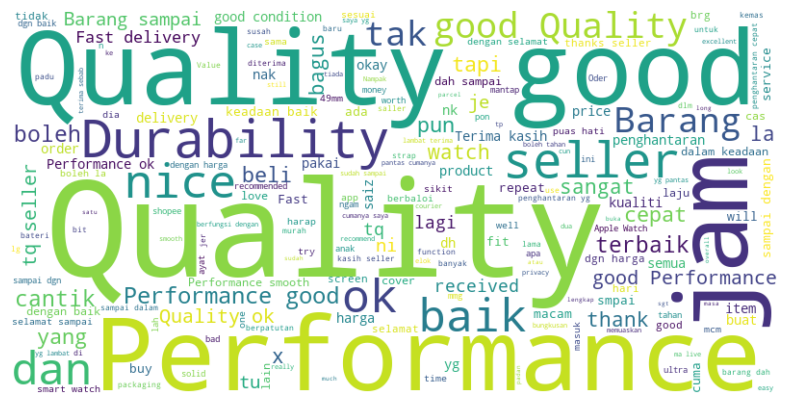

In [25]:
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_clean_df['Review']]
reviews_text = ' '.join(cleaned_reviews)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
combined_clean_df

,Author,Date,Rating,Rating Delivery Service,Rating Product Quality,Rating Seller Service,Review,Product Type,Oversea Shopping,Region,Picture Included
2,k*****o,11/13/2023 11:58,5,5,5,5,Performance:ok semua bagus\nQuality:cantik\n\n...,Black,no,my,no
7,fauzilianaakassim,12/2/2023 13:37,5,5,5,5,Quality:good\nPerformance:good\n\nboleh tahan ...,Black,no,my,yes
8,m*****0,12/3/2023 7:13,5,5,5,5,Performance:good\n\nvery good\n,Orange,no,my,yes
11,gxnxdorstudios,12/23/2023 3:30,2,5,2,5,100% not same as advertise..\nGot scratch at w...,Orange,no,my,no
17,_iqram1,1/28/2024 11:03,5,5,5,5,Performance:barang cun. Sampai pun cepat\n,X20（Extended battery capacity）,no,my,yes
...,...,...,...,...,...,...,...,...,...,...,...
547,asnirulfitri,20/4/2024 1:50,5,5,5,5,Just nice. Overall everything is good. The qua...,Black,no,my,yes
548,nurulbaltrisya,20/4/2024 9:33,5,5,5,5,Quality:good,Black,no,my,no
549,fahmibahaudin,20/4/2024 16:07,5,5,5,5,Performance:good\nQuality:good\n\n1.penghantar...,Black,no,my,yes
550,nazrul_20,20/4/2024 19:49,5,5,5,5,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,Black,no,my,yes


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">EDA</p>

In [27]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Review', 'Date','Rating']
combined_clean_df = combined_clean_df[selected_columns]

# Display the new DataFrame
print(combined_clean_df)

                                                Review              Date  \
2    Performance:ok semua bagus\nQuality:cantik\n\n...  11/13/2023 11:58   
7    Quality:good\nPerformance:good\n\nboleh tahan ...   12/2/2023 13:37   
8                      Performance:good\n\nvery good\n    12/3/2023 7:13   
11   100% not same as advertise..\nGot scratch at w...   12/23/2023 3:30   
17          Performance:barang cun. Sampai pun cepat\n   1/28/2024 11:03   
..                                                 ...               ...   
547  Just nice. Overall everything is good. The qua...    20/4/2024 1:50   
548                                       Quality:good    20/4/2024 9:33   
549  Performance:good\nQuality:good\n\n1.penghantar...   20/4/2024 16:07   
550  RM0 Panggilan tak dijawab? Dapatkan NotifyStat...   20/4/2024 19:49   
551  Performance:very bad\nQuality:worst\n\nYou buy...    21/4/2024 5:28   

     Rating  
2         5  
7         5  
8         5  
11        2  
17        5  
.. 

In [34]:
# case folding and lowercasing
def casefolding(Review):
    Review = Review.lower()
    return Review
combined_clean_df['LowerCaseReview'] = combined_clean_df['Review'].apply(casefolding)
combined_clean_df

,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,"[performance, :, ok, semua, bagus, quality, :,..."
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,"[quality, :, good, performance, :, good, boleh..."
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,"[performance, :, good, very, good]"
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,"[100, not, same, as, advertise, got, scratch, ..."
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,"[performance, :, barang, cun, sampai, pun, cepat]"
...,...,...,...,...,...,...,...
547,Just nice. Overall everything is good. The qua...,20/4/2024 1:50,5,just nice. overall everything is good. the qua...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,"[just, nice, overall, everything, is, good, th..."
548,Quality:good,20/4/2024 9:33,5,quality:good,quality:good,quality:good,"[quality, :, good]"
549,Performance:good\nQuality:good\n\n1.penghantar...,20/4/2024 16:07,5,performance:good\nquality:good\n\n1.penghantar...,performance:good quality:good 1.penghantaran p...,performance:good quality:good 1.penghantaran p...,"[performance, :, good, quality, :, good, 1.pen..."
550,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,20/4/2024 19:49,5,rm0 panggilan tak dijawab? dapatkan notifystat...,rm0 panggilan tak dijawab dapatkan notifystatu...,rm0 panggilan tak dijawab dapatkan notifystatu...,"[rm0, panggilan, tak, dijawab, dapatkan, notif..."


In [35]:
remove = set(string.punctuation)

def remove_punctuation(text):
    return ' '.join(word.strip(''.join(remove)) for word in text.split())

# Apply the function to the 'Review_Lcase' column
combined_clean_df['RemovedPuncReview'] = combined_clean_df['LowerCaseReview'].apply(remove_punctuation)

# Display the updated DataFrame
combined_clean_df

,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,"[performance, :, ok, semua, bagus, quality, :,..."
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,"[quality, :, good, performance, :, good, boleh..."
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,"[performance, :, good, very, good]"
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,"[100, not, same, as, advertise, got, scratch, ..."
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,"[performance, :, barang, cun, sampai, pun, cepat]"
...,...,...,...,...,...,...,...
547,Just nice. Overall everything is good. The qua...,20/4/2024 1:50,5,just nice. overall everything is good. the qua...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,"[just, nice, overall, everything, is, good, th..."
548,Quality:good,20/4/2024 9:33,5,quality:good,quality:good,quality:good,"[quality, :, good]"
549,Performance:good\nQuality:good\n\n1.penghantar...,20/4/2024 16:07,5,performance:good\nquality:good\n\n1.penghantar...,performance:good quality:good 1.penghantaran p...,performance:good quality:good 1.penghantaran p...,"[performance, :, good, quality, :, good, 1.pen..."
550,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,20/4/2024 19:49,5,rm0 panggilan tak dijawab? dapatkan notifystat...,rm0 panggilan tak dijawab dapatkan notifystatu...,rm0 panggilan tak dijawab dapatkan notifystatu...,"[rm0, panggilan, tak, dijawab, dapatkan, notif..."


In [36]:
combined_clean_df['RemovedPuncReview'] = combined_clean_df['RemovedPuncReview'].astype(str)

combined_clean_df['DemojiReview'] = combined_clean_df['RemovedPuncReview'].apply(lambda x: demoji.replace(x, ''))

# Display the updated DataFrame
combined_clean_df


,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,"[performance, :, ok, semua, bagus, quality, :,..."
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,"[quality, :, good, performance, :, good, boleh..."
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,"[performance, :, good, very, good]"
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,"[100, not, same, as, advertise, got, scratch, ..."
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,"[performance, :, barang, cun, sampai, pun, cepat]"
...,...,...,...,...,...,...,...
547,Just nice. Overall everything is good. The qua...,20/4/2024 1:50,5,just nice. overall everything is good. the qua...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,"[just, nice, overall, everything, is, good, th..."
548,Quality:good,20/4/2024 9:33,5,quality:good,quality:good,quality:good,"[quality, :, good]"
549,Performance:good\nQuality:good\n\n1.penghantar...,20/4/2024 16:07,5,performance:good\nquality:good\n\n1.penghantar...,performance:good quality:good 1.penghantaran p...,performance:good quality:good 1.penghantaran p...,"[performance, :, good, quality, :, good, 1.pen..."
550,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,20/4/2024 19:49,5,rm0 panggilan tak dijawab? dapatkan notifystat...,rm0 panggilan tak dijawab dapatkan notifystatu...,rm0 panggilan tak dijawab dapatkan notifystatu...,"[rm0, panggilan, tak, dijawab, dapatkan, notif..."


In [37]:
# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
combined_clean_df['ContractionReview'] = combined_clean_df['DemojiReview'].apply(expand_contractions)

# Display the updated DataFrame
combined_clean_df.head()

,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,performance:good very good
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Tokenization</p>

In [38]:
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
combined_clean_df['ContractionReview'] = combined_clean_df['ContractionReview'].apply(word_tokenize_wrapper)
combined_clean_df.head()

,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,"[performance, :, ok, semua, bagus, quality, :,..."
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,"[quality, :, good, performance, :, good, boleh..."
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,"[performance, :, good, very, good]"
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,"[100, not, same, as, advertise, got, scratch, ..."
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,"[performance, :, barang, cun, sampai, pun, cepat]"


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Lemmatization</p>

In [41]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
#nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply lemmatization to each tokenized list in 'ContractionReview' column
combined_clean_df['ContractionReview'] = combined_clean_df['ContractionReview'].apply(lemmatize_tokens)

# Reconstruct sentences from lemmatized tokens
combined_clean_df['lemma_review'] = combined_clean_df['ContractionReview'].apply(lambda tokens: ' '.join(tokens))

combined_clean_df[['Review','ContractionReview','lemma_review']].head(20)

,Review,ContractionReview,lemma_review
2,Performance:ok semua bagus\nQuality:cantik\n\n...,"[performance, :, ok, semua, bagus, quality, :,...",performance : ok semua bagus quality : cantik ...
7,Quality:good\nPerformance:good\n\nboleh tahan ...,"[quality, :, good, performance, :, good, boleh...",quality : good performance : good boleh tahan ...
8,Performance:good\n\nvery good\n,"[performance, :, good, very, good]",performance : good very good
11,100% not same as advertise..\nGot scratch at w...,"[100, not, same, a, advertise, got, scratch, a...",100 not same a advertise got scratch at watch ...
17,Performance:barang cun. Sampai pun cepat\n,"[performance, :, barang, cun, sampai, pun, cepat]",performance : barang cun sampai pun cepat
23,"barang cntik, kuah tidak kedekut. nasi pun sed...","[barang, cntik, kuah, tidak, kedekut, nasi, pu...",barang cntik kuah tidak kedekut nasi pun sedap...
24,Amazing,[amazing],amazing
25,Thank you,"[thank, you]",thank you
27,Yang ni dari unboxing tadi..tak hidup2,"[yang, ni, dari, unboxing, tadi, .., tak, hidup2]",yang ni dari unboxing tadi .. tak hidup2
28,Performance:jam menarik and byk wallpaper \nQu...,"[performance, :, jam, menarik, and, byk, wallp...",performance : jam menarik and byk wallpaper qu...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Normaliaztion</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Pos-Tagging</p>

- either dictionary (Rule-Based Tagging) or probability (HMM)

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')


In [44]:
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'ContrationComment' column
combined_clean_df['POS_Tags'] = combined_clean_df['ContractionReview'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_clean_df[['ContractionReview', 'POS_Tags']])


                                     ContractionReview  \
2    [performance, :, ok, semua, bagus, quality, :,...   
7    [quality, :, good, performance, :, good, boleh...   
8                   [performance, :, good, very, good]   
11   [100, not, same, a, advertise, got, scratch, a...   
17   [performance, :, barang, cun, sampai, pun, cepat]   
..                                                 ...   
547  [just, nice, overall, everything, is, good, th...   
548                                 [quality, :, good]   
549  [performance, :, good, quality, :, good, 1.pen...   
550  [rm0, panggilan, tak, dijawab, dapatkan, notif...   
551  [performance, :, very, bad, quality, :, worst,...   

                                              POS_Tags  
2    [(performance, NN), (:, :), (ok, JJ), (semua, ...  
7    [(quality, NN), (:, :), (good, JJ), (performan...  
8    [(performance, NN), (:, :), (good, JJ), (very,...  
11   [(100, CD), (not, RB), (same, JJ), (a, DT), (a...  
17   [(performance

In [45]:
combined_clean_df.to_csv('contraction_dataset.csv', index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Stemming</p>

In [46]:
def stemming(ContractionReview):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in ContractionReview:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
combined_clean_df['ContractionReview'] = combined_clean_df['ContractionReview'].apply(stemming)

combined_clean_df['ContractionReview']

performance  ok semua bagus quality  cantik ayat bentuk daripada satu atau lebih susun kata yang ucap mula dan akhir dengan senyap serta engandungi intonasi yang sempurna tiap bahasa punya jumlah ayat yang tidak had bilang namun dalam jumlah bilang yang tidak had itu ayat sebut benar terbahagi kepada dua golong iaitu ayat dasar dan ayat terbit turut abdullah hassan et al 2006 ayat diri daripada perkataaan kata yang susun dalam susun dan kelompok tentu tiap kelompok kata susun dengan lengkap susun yang lengkap punya makna yang lengkap tiap satu kelompok sebut kandung kurang kurang dua bahagian iaitu subjek dan predikat subjek ada di ialah yang terang manakala predikat pula ialah yang terang klausa ialah satu rangkai kata yang kandung subjek dan predikat yang jadi konstituen dal ayat klausa golong dal dua jenis iaitu klausa bebas dan klausa tak bebas
quality  good performance  good boleh tahan la jgk jam ni  harap2 boleh la pakai lama kan
performance  good very good
100 not same a advert

shopee is the leading e-commerce online shopping platform in southeast asia and taiwan it provides customer with an easy secure and fast online shopping
durability  terlalu teruk quality  sangat teruk hmm
durability  good quality  good need to press a bit but not so hard rest are excellent privacy and nice colour thanks
quality  kecik tak muat tempered glass cover for apple watch ultra 49mm 8 44mm 40mm 42mm privacy film
tq seller me received on a good condition
item alit apa api batu jam robok kerusi limit katil ular ayam
good nice delivery can get more fast is very good nice color
quality  sgt2 bagus skli oyen aku pon suke barang mmg cntik
very nice exprince for shoping at the store very nice quality really a bargin price really fast to proceed shipment i m very sure will make a shopping at the store again once again really nice service and cheapest in the town
parcel received in good condition and good condition nice design4
quality  good quality barang padu dan premium  tahan lasak 

tak sama size huhu 49mm
durability  it very nice my watch not apple i am buying the wrong case
barang sampai dengan selamat tapi tak ngam dia punya tepi kiri tu so yang nk beli tu baca komen aku ni dulu takut tak ngam sbb belah kiri tu tak boleh masuk n tak boleh nk tap tap skrin jadi ini tak puas hati
durability  not good quality  feeting not good
durability 9 10 quality 10 10 love it perfect protection tempered glass protector scratch le case
quality  worth for money durability  it is anti spy i love it
quality  ok je cuma salah order
barang sdh sampai  penghantarn yg lambt
quality  good fit perfectly will repeat again thanx
not fit anyway nice product
ok nice murah giler compare beli kt local market tp delivery lame btol 2 mggu bru smpai tepas begaya time raya
performance  smooth quality  super
quality 1 1 like an apple watch performance  smooth and sufficient a the price offered nice watch recommended
quality  oklaaa semua fungsi dgn baik  tq saller
performance  padu macam apple wa

baik
performance  good quality  good good
item ok cuma belum lagi on hantar kemas
quality  good performance  smooth repeat beli kali dua kali ni     memang baik ambil masa 3hari sahaja sudah datang
received with good packaging and thanks for the saler and courier service
quality  padu performance  padu kita tgk minggu pakai mcm mana
quality  baik performance  ok
easy to use my son very like it
what a wonderful watch easy to use get many function and suitable for primary student
again and again highly recommend this i bought 3rd because all my friend want
performance  tq
performance  good quality  good
quality  good
performance  baik quality  ok baik apa la da ca sekjap trus tak boleh on
performance  good quality  good it fit and well made delivery also fast thank you seller
performance  good quality  good jam di terima dlm ada baik  jam fungsi ngn baik  cantik  kemas  gaya
nice seller recommended seller quality item nice shipping nice

quality  good performance  ok fast delivery  worth

2      performance  ok semua bagus quality  cantik ay...
7      quality  good performance  good boleh tahan la...
8                            performance  good very good
11     100 not same a advertise got scratch at watch ...
17              performance  barang cun sampai pun cepat
                             ...                        
547    just nice overall everything is good the quali...
548                                        quality  good
549    performance  good quality  good 1 hantar panta...
550    rm0 panggil tak jawab dapat notifystatus denga...
551    performance  very bad quality  worst you buy n...
Name: ContractionReview, Length: 411, dtype: object

In [47]:
combined_clean_df

,Review,Date,Rating,LowerCaseReview,RemovedPuncReview,DemojiReview,ContractionReview,lemma_review,POS_Tags
2,Performance:ok semua bagus\nQuality:cantik\n\n...,11/13/2023 11:58,5,performance:ok semua bagus\nquality:cantik\n\n...,performance:ok semua bagus quality:cantik ayat...,performance:ok semua bagus quality:cantik ayat...,performance ok semua bagus quality cantik ay...,performance : ok semua bagus quality : cantik ...,"[(performance, NN), (:, :), (ok, JJ), (semua, ..."
7,Quality:good\nPerformance:good\n\nboleh tahan ...,12/2/2023 13:37,5,quality:good\nperformance:good\n\nboleh tahan ...,quality:good performance:good boleh tahan la j...,quality:good performance:good boleh tahan la j...,quality good performance good boleh tahan la...,quality : good performance : good boleh tahan ...,"[(quality, NN), (:, :), (good, JJ), (performan..."
8,Performance:good\n\nvery good\n,12/3/2023 7:13,5,performance:good\n\nvery good\n,performance:good very good,performance:good very good,performance good very good,performance : good very good,"[(performance, NN), (:, :), (good, JJ), (very,..."
11,100% not same as advertise..\nGot scratch at w...,12/23/2023 3:30,2,100% not same as advertise..\ngot scratch at w...,100 not same as advertise got scratch at watch...,100 not same as advertise got scratch at watch...,100 not same a advertise got scratch at watch ...,100 not same a advertise got scratch at watch ...,"[(100, CD), (not, RB), (same, JJ), (a, DT), (a..."
17,Performance:barang cun. Sampai pun cepat\n,1/28/2024 11:03,5,performance:barang cun. sampai pun cepat\n,performance:barang cun sampai pun cepat,performance:barang cun sampai pun cepat,performance barang cun sampai pun cepat,performance : barang cun sampai pun cepat,"[(performance, NN), (:, :), (barang, NN), (cun..."
...,...,...,...,...,...,...,...,...,...
547,Just nice. Overall everything is good. The qua...,20/4/2024 1:50,5,just nice. overall everything is good. the qua...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,just nice overall everything is good the quali...,"[(just, RB), (nice, JJ), (overall, JJ), (every..."
548,Quality:good,20/4/2024 9:33,5,quality:good,quality:good,quality:good,quality good,quality : good,"[(quality, NN), (:, :), (good, JJ)]"
549,Performance:good\nQuality:good\n\n1.penghantar...,20/4/2024 16:07,5,performance:good\nquality:good\n\n1.penghantar...,performance:good quality:good 1.penghantaran p...,performance:good quality:good 1.penghantaran p...,performance good quality good 1 hantar panta...,performance : good quality : good 1.penghantar...,"[(performance, NN), (:, :), (good, JJ), (quali..."
550,RM0 Panggilan tak dijawab? Dapatkan NotifyStat...,20/4/2024 19:49,5,rm0 panggilan tak dijawab? dapatkan notifystat...,rm0 panggilan tak dijawab dapatkan notifystatu...,rm0 panggilan tak dijawab dapatkan notifystatu...,rm0 panggil tak jawab dapat notifystatus denga...,rm0 panggilan tak dijawab dapatkan notifystatu...,"[(rm0, NN), (panggilan, NN), (tak, VBP), (dija..."


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classify Contravtion Comments into 3 Categories</p>

In [48]:
# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_Rating' column
combined_clean_df['Sentiment_Rating'] = combined_clean_df['Rating'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_Rating' column
print(combined_clean_df[['ContractionReview','Rating', 'Sentiment_Rating']])

combined_clean_df.to_csv('sentimentRating.csv', index=False)

                                     ContractionReview  Rating  \
2    performance  ok semua bagus quality  cantik ay...       5   
7    quality  good performance  good boleh tahan la...       5   
8                          performance  good very good       5   
11   100 not same a advertise got scratch at watch ...       2   
17            performance  barang cun sampai pun cepat       5   
..                                                 ...     ...   
547  just nice overall everything is good the quali...       5   
548                                      quality  good       5   
549  performance  good quality  good 1 hantar panta...       5   
550  rm0 panggil tak jawab dapat notifystatus denga...       5   
551  performance  very bad quality  worst you buy n...       1   

    Sentiment_Rating  
2           Positive  
7           Positive  
8           Positive  
11          Negative  
17          Positive  
..               ...  
547         Positive  
548         Positive  


In [49]:
# Count the number of reviews for each sentiment for 'Contraction_Review'
sentiment_counts_Rating = combined_clean_df['Sentiment_Rating'].value_counts()

# Display the counts for 'Contraction_Review'
print("Sentiment Counts for Contration_Review_Rating:")
print(sentiment_counts_Rating)


Sentiment Counts for Contration_Review_Rating:
Positive    361
Negative     34
Neutral      16
Name: Sentiment_Rating, dtype: int64


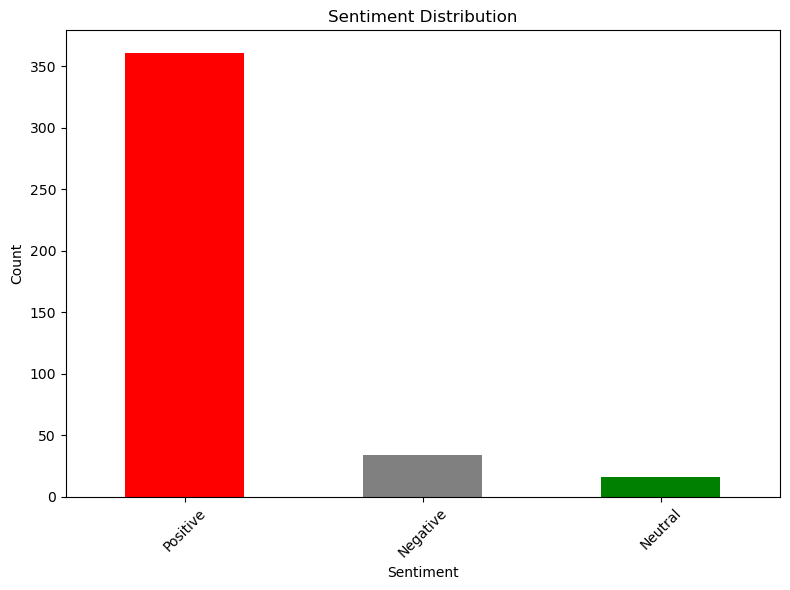

In [74]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment rating
sentiment_counts = combined_clean_df['Sentiment_Rating'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'grey', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


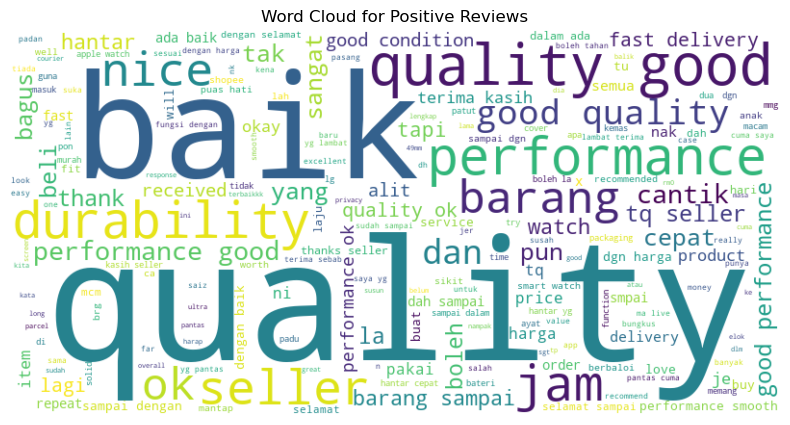

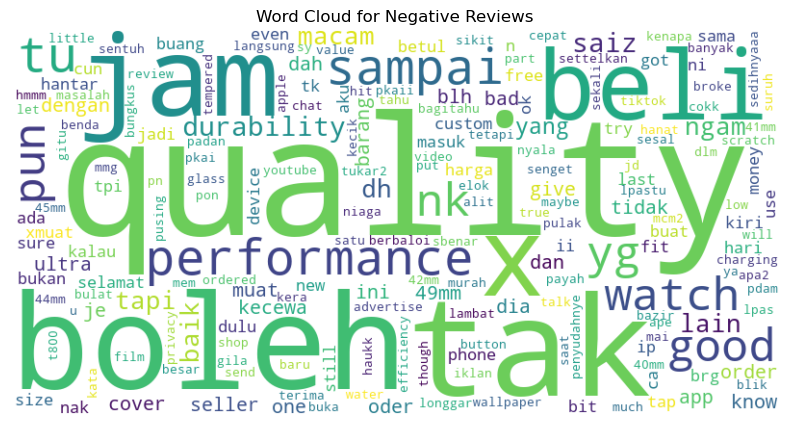

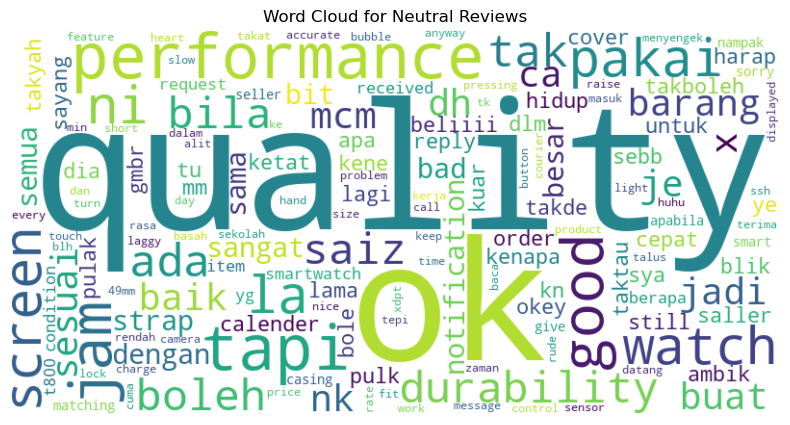

In [50]:
# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = combined_clean_df[combined_clean_df['Sentiment_Rating'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['ContractionReview'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = combined_clean_df['Sentiment_Rating'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Save as CSV File</p>

In [51]:
# Create a DataFrame with only the desired columns
selected_columns = ['ContractionReview', 'Sentiment_Rating']
selected_data = combined_clean_df[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Contraction Review & Sentiment Rating.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Contraction Review & Sentiment Rating.csv")


Selected columns saved to Contraction Review & Sentiment Rating.csv


In [52]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv', encoding='latin1')
finalData.head()

,ContractionReview,Sentiment_Rating
0,performance ok semua bagus quality cantik ay...,Positive
1,quality good performance good boleh tahan la...,Positive
2,performance good very good,Positive
3,100 not same a advertise got scratch at watch ...,Negative
4,performance barang cun sampai pun cepat,Positive


In [53]:
finalData.isnull().any().any()

True

In [54]:
# Drop rows with empty reviews
finalData = finalData.dropna(subset=['ContractionReview'])
finalData = finalData.dropna(subset=['Sentiment_Rating'])


In [55]:
finalData.isnull().any().any()

False


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Feature Engineering </p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">TF - IDF</p>

In [49]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(finalData['ContractionReview'].astype('U'))

#tf = TfidfVectorizer()
#text_tf = tf.fit_transform(finalData['ContractionReview'].astype('U'))
#print(text_tf)

  (0, 1204)	0.030601183738101237
  (0, 139)	0.1099493485071152
  (0, 560)	0.0549746742535576
  (0, 313)	0.1099493485071152
  (0, 629)	0.0549746742535576
  (0, 550)	0.04292169929802946
  (0, 971)	0.0549746742535576
  (0, 619)	0.2198986970142304
  (0, 956)	0.051449405068
  (0, 732)	0.0549746742535576
  (0, 1239)	0.1099493485071152
  (0, 521)	0.1649240227606728
  (0, 341)	0.04292169929802946
  (0, 35)	0.03172460009696952
  (0, 927)	0.1649240227606728
  (0, 1175)	0.1649240227606728
  (0, 115)	0.0549746742535576
  (0, 640)	0.102898810136
  (0, 575)	0.1099493485071152
  (0, 727)	0.0549746742535576
  (0, 676)	0.14684456032738058
  (0, 1235)	0.0549746742535576
  (0, 592)	0.1649240227606728
  (0, 908)	0.0549746742535576
  (0, 347)	0.0549746742535576
  :	:
  (407, 100)	0.24311428272452595
  (407, 826)	0.24311428272452595
  (407, 554)	0.24311428272452595
  (407, 1214)	0.20087358732263577
  (407, 316)	0.22752449886323733
  (407, 879)	0.22752449886323733
  (407, 251)	0.22752449886323733
  (407, 101

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the documents and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Print feature names (terms)
print("Feature names:", tfidf_vectorizer.get_feature_names_out())

# Print TF-IDF matrix
print("TF-IDF matrix:")
print(tfidf_matrix.toarray())


Feature names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF matrix:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Split Data</p>

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
finalData = pd.read_csv("Contraction Review & Sentiment Rating.csv")

# Train-Test Split (assuming 'sentiment' is your target column)
X_train, X_test, y_train, y_test = train_test_split(finalData.drop('Sentiment_Rating', axis=1), finalData['Sentiment_Rating'], test_size=0.2)
#X_train, X_test, y_train, y_test
# Print the shapes of training and testing sets
print("Number of samples in Training Set:", len(X_train))
print("Number of samples in Testing Set:", len(X_test))


Number of samples in Training Set: 328
Number of samples in Testing Set: 83


In [77]:
finalData

,ContractionReview,Sentiment_Rating
0,performance ok semua bagus quality cantik ay...,Positive
1,quality good performance good boleh tahan la...,Positive
2,performance good very good,Positive
3,100 not same a advertise got scratch at watch ...,Negative
4,performance barang cun sampai pun cepat,Positive
...,...,...
406,just nice overall everything is good the quali...,Positive
407,quality good,Positive
408,performance good quality good 1 hantar panta...,Positive
409,rm0 panggil tak jawab dapat notifystatus denga...,Positive


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [81]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(X_train)

In [82]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [83]:
# Pad sequences to have the same length
maxlen = 50
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')


In [84]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [85]:
# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)


In [86]:
# Assuming 'your_data.csv' is your dataset
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv')


In [87]:
finalData

,ContractionReview,Sentiment_Rating
0,performance ok semua bagus quality cantik ay...,Positive
1,quality good performance good boleh tahan la...,Positive
2,performance good very good,Positive
3,100 not same a advertise got scratch at watch ...,Negative
4,performance barang cun sampai pun cepat,Positive
...,...,...
406,just nice overall everything is good the quali...,Positive
407,quality good,Positive
408,performance good quality good 1 hantar panta...,Positive
409,rm0 panggil tak jawab dapat notifystatus denga...,Positive


In [89]:
# Assuming 'Review' column contains text data
text_data = finalData['ContractionReview']
print(text_data)

0      performance  ok semua bagus quality  cantik ay...
1      quality  good performance  good boleh tahan la...
2                            performance  good very good
3      100 not same a advertise got scratch at watch ...
4               performance  barang cun sampai pun cepat
                             ...                        
406    just nice overall everything is good the quali...
407                                        quality  good
408    performance  good quality  good 1 hantar panta...
409    rm0 panggil tak jawab dapat notifystatus denga...
410    performance  very bad quality  worst you buy n...
Name: ContractionReview, Length: 411, dtype: object


In [104]:
nan_indices = []
for index, value in text_data.items():
  if pd.isna(value):
    nan_indices.append(index)

# Remove rows with NaN values (optional)
text_data = text_data.drop(nan_indices)

# Assuming text_data has been cleaned
tfidf_vectorizer = TfidfVectorizer()
text_matrix = tfidf_vectorizer.fit_transform(text_data)


<1x1391 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [66]:
y = finalData['Sentiment_Rating']


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Training, Testing and Evaluation</p>

# kenneth

In [141]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv')

In [142]:
finalData.columns

Index(['ContractionReview', 'Sentiment_Rating'], dtype='object')

In [143]:
# Drop rows with missing values (NaNs) in 'text' and 'sentiment' columns
finalData.dropna(subset=['ContractionReview', 'Sentiment_Rating'], inplace=True)

In [144]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finalData['ContractionReview'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)


# SVM

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=16)  # You can adjust max_features based on your dataset size

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(x_train_tfidf, y_train)

# Make predictions on the test set
predicted = svm_model.predict(x_test_tfidf)

print('The resulting accuracy using SVM is {:.2f}%'.format(100 * accuracy))



The resulting accuracy using SVM is 95.12%


# Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB

# Create a CountVectorizer to convert text documents to a matrix of token counts
count_vectorizer = CountVectorizer()

# Fit and transform the training data
x_train_counts = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_counts = count_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(x_train_counts, y_train)

# Make predictions on the test set
predicted = nb_classifier.predict(x_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print('The resulting accuracy using Naive Bayes is {:.2f}%'.format(100 * accuracy))

The resulting accuracy using Naive Bayes is 92.68%


In [ ]:
#Random Forest Logistic Regression Neural Networks

# Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Create a CountVectorizer to convert text documents to a matrix of token counts
count_vectorizer = CountVectorizer()

# Fit and transform the training data
x_train_counts = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_counts = count_vectorizer.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train_counts, y_train)

# Make predictions on the test set
predicted = rf_classifier.predict(x_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print('The resulting accuracy using Random Forest is {:.2f}%'.format(100 * accuracy))

The resulting accuracy using Random Forest is 93.90%



# Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

# Create a CountVectorizer to convert text documents to a matrix of token counts
count_vectorizer = CountVectorizer()

# Fit and transform the training data
x_train_counts = count_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
x_test_counts = count_vectorizer.transform(X_test)

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
logistic_classifier.fit(x_train_counts, y_train)

# Make predictions on the test set
predicted = logistic_classifier.predict(x_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print('The resulting accuracy using Logistic Regression is {:.2f}%'.format(100 * accuracy))

The resulting accuracy using Logistic Regression is 92.68%



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machinem (SVM)</p>

In [ ]:
#X_train, X_test, y_train, y_test

In [98]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10)  # You can adjust max_features based on your dataset size
print(f'tfidf_vectorizer : {tfidf_vectorizer}')

# Fit and transform the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print(f'x_train_tfidf : {x_train_tfidf}')

# Transform the test data using the same vectorizer
x_test_tfidf = tfidf_vectorizer.transform(X_test)
print(f'x_test_tfidf : {x_test_tfidf}')

# Create an SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Train the model
svm_rbf.fit(x_train_tfidf, y_train)

# Make predictions on the test set
#predicted = svm_rbf.predict(x_test_tfidf)

# Calculate accuracy
#accuracy = accuracy_score(y_test, predicted)
#print('The resulting accuracy using RBF is {:.2f}%'.format(100 * accuracy))


tfidf_vectorizer : TfidfVectorizer(max_features=10)
x_train_tfidf :   (0, 0)	1.0
x_test_tfidf :   (0, 0)	1.0


ValueError: Found input variables with inconsistent numbers of samples: [1, 328]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# Calculate performance metrics for SVM
accuracy_svm = accuracy_score(y_test, predicted)
precision_svm = precision_score(y_test, predicted, average='micro')
recall_svm = recall_score(y_test, predicted, average='micro')
f1_svm = f1_score(y_test, predicted, average='micro')

print('SVM Model Metrics:')
print('Accuracy: {:.4f}'.format(accuracy_svm))
print('Precision: {:.4f}'.format(precision_svm))
print('Recall: {:.4f}'.format(recall_svm))
print('F1 Score: {:.4f}'.format(f1_svm))



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Simple Neural Network (SNN)</p>

In [73]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust the vocabulary size as needed
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(X_train)
x_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
maxlen = 50  # Adjust the sequence length as needed
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Build a Simple Neural Network (SNN) model
snn_model = Sequential()
snn_model.add(Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
snn_model.add(Flatten())
snn_model.add(Dense(128, activation='relu'))
snn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
snn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the SNN model
snn_model.fit(x_train_padded, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the SNN model on the test set
score = snn_model.evaluate(x_test_padded, y_test_one_hot, verbose=1)
print(f"SNN Model Test Loss: {score[0]}, Accuracy: {score[1]}")

# Predictions on the test set
y_pred_prob_snn = snn_model.predict(x_test_padded)
y_pred_snn = np.argmax(y_pred_prob_snn, axis=1)

# Decode the encoded labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels_snn = label_encoder.inverse_transform(y_pred_snn)

# Calculate accuracy
accuracy_snn = accuracy_score(y_test_labels, y_pred_labels_snn)
print(f"SNN Model Accuracy on the test set: {accuracy_snn * 100:.2f}%")

ValueError: Training data contains 1 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.

In [ ]:
# Calculate the confusion matrix for SNN
cm_snn = confusion_matrix(y_test_labels, y_pred_labels_snn)

# Plot the confusion matrix for SNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_snn, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SNN Model')
plt.show()

# Calculate performance metrics for SNN
precision_snn = precision_score(y_test_labels, y_pred_labels_snn, average='micro')
recall_snn = recall_score(y_test_labels, y_pred_labels_snn, average='micro')
f1_snn = f1_score(y_test_labels, y_pred_labels_snn, average='micro')

print('SNN Model Metrics:')
print('Precision: {:.4f}'.format(precision_snn))
print('Recall: {:.4f}'.format(recall_snn))
print('F1 Score: {:.4f}'.format(f1_snn))


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Convolutional Neural Network (CNN)</p>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
maxlen = 50
x_train_padded = pad_sequences(x_train_sequences, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=maxlen, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Build a Convolutional Neural Network (CNN) model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_padded, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the CNN model on the test set
score = cnn_model.evaluate(x_test_padded, y_test_one_hot, verbose=1)
print(f"CNN Model Test Loss: {score[0]}, Accuracy: {score[1]}")

# Make predictions on the test set
y_pred_prob_cnn = cnn_model.predict(x_test_padded)
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)

# Decode the encoded labels
y_test_labels = label_encoder.inverse_transform(y_test_encoded)
y_pred_labels_cnn = label_encoder.inverse_transform(y_pred_cnn)

# Calculate accuracy
accuracy_cnn = accuracy_score(y_test_labels, y_pred_labels_cnn)
print(f"CNN Model Accuracy on the test set: {accuracy_cnn * 100:.2f}%")


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Model</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-Nearest Neighbours (KNN)</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">BERT Model</p>


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Sentiment Analysis</p>

##### After Model Training, Testing and Evaluation, appropriate sentimer analysis model that effectively handle the Sentiment Reviews & Ratings is --- with highest accuracy of --- %.

# clustering

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocess your text data
text_data = finalData['ContractionReview']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range based on your preference
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because the range starts from 2

# Create and fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the dataset
finalData['cluster_label'] = kmeans.labels_

# Print the cluster centers (optional)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print the silhouette score
print("Silhouette Score:", silhouette_score(tfidf_matrix, kmeans.labels_))

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(finalData['cluster_label'].value_counts())


Cluster Centers:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03148582 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Silhouette Score: 0.02656092192844875
Count of data points in each cluster:
3    144
0     74
4     63
1     43
7     29
5     23
2     17
6     16
Name: cluster_label, dtype: int64


In [171]:
finalData

,ContractionReview,Sentiment_Rating,label_encoded,cluster_label
0,performance ok semua bagus quality cantik ay...,Positive,2,3
1,quality good performance good boleh tahan la...,Positive,2,3
2,performance good very good,Positive,2,5
3,100 not same a advertise got scratch at watch ...,Negative,0,3
4,performance barang cun sampai pun cepat,Positive,2,0
...,...,...,...,...
406,just nice overall everything is good the quali...,Positive,2,4
407,quality good,Positive,2,5
408,performance good quality good 1 hantar panta...,Positive,2,0
409,rm0 panggil tak jawab dapat notifystatus denga...,Positive,2,3


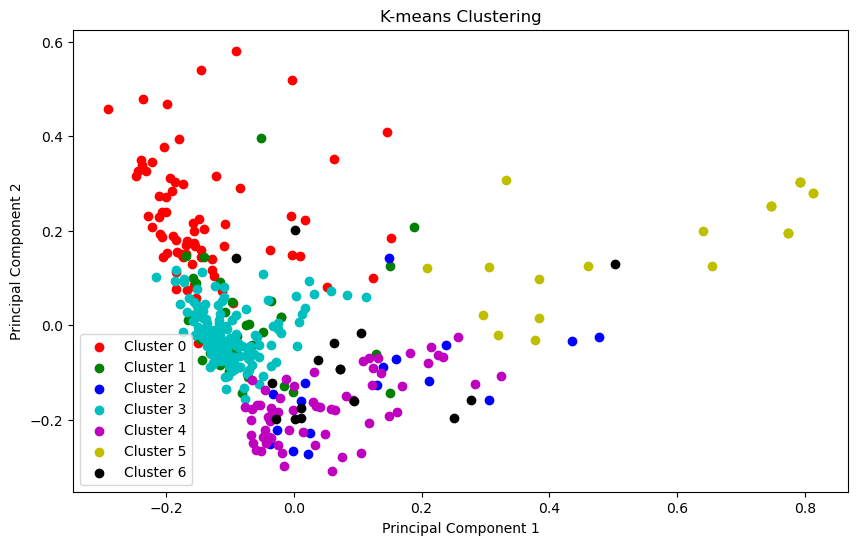

In [172]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of TF-IDF matrix to 2 dimensions using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Add more colors if needed
for cluster_label, color in zip(range(optimal_num_clusters), colors):
    cluster_data = tfidf_matrix_2d[finalData['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {cluster_label}')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


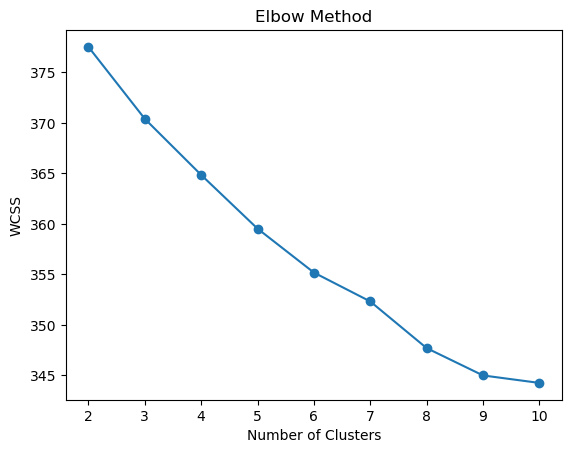

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Preprocess your text data
text_data = finalData['ContractionReview']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(2, 11):  # You can adjust the range based on your preference
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.show()


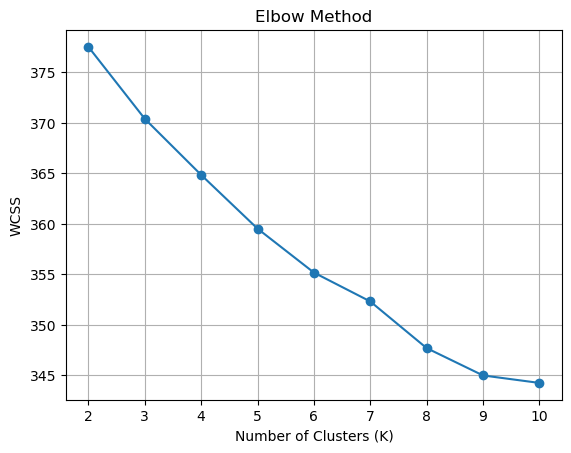

Count of data points in each cluster:
2    233
0    105
1     71
Name: cluster_label, dtype: int64


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocess your text data
text_data = finalData['ContractionReview']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(2, 11):  # You can adjust the range based on your preference
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the optimal K based on the Elbow method
optimal_k = 3  # Set this to the elbow point you observed in the plot

# Train the K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the dataset
finalData['cluster_label'] = kmeans.labels_

# Print the count of data points in each cluster
print("Count of data points in each cluster:")
print(finalData['cluster_label'].value_counts())


In [175]:
# DBSCAN Gaussian Mixture Models Spectral Clustering Hierarchical Clustering

In [178]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score


# Preprocess your text data
text_data = finalData['ContractionReview']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert sparse matrix to dense numpy array
tfidf_matrix_dense = tfidf_matrix.toarray()

# Dictionary to store silhouette scores of different clustering algorithms
silhouette_scores = {}

# Define clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "MeanShift": MeanShift(),
    "Spectral": SpectralClustering(n_clusters=3),
    "AffinityPropagation": AffinityPropagation()
}

# Apply clustering algorithms
for name, algorithm in clustering_algorithms.items():
    algorithm.fit(tfidf_matrix_dense)
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
        n_clusters = len(set(labels))
    else:
        labels = algorithm.predict(tfidf_matrix_dense)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Account for noise points in DBSCAN
    if n_clusters > 1:
        silhouette_scores[name] = silhouette_score(tfidf_matrix_dense, labels)
    else:
        print(f"Warning: {name} failed to identify meaningful clusters.")

# Print silhouette scores
print("\nSilhouette Scores:")
for name, score in silhouette_scores.items():
    print(f"{name}: {score}")



Silhouette Scores:
KMeans: 0.024291692873608974
Agglomerative: 0.003712110979804967
DBSCAN: -0.006813876449761577
Spectral: 0.005544843900675349
AffinityPropagation: 0.04599804328167061



Based on the silhouette scores, higher values indicate better cluster separation. Here's a breakdown of the silhouette scores:

KMeans: 0.0243
Agglomerative: 0.0037
DBSCAN: -0.0068
Spectral: 0.0055
AffinityPropagation: 0.0460
Among these algorithms, Affinity Propagation has the highest silhouette score, indicating better cluster separation compared to the others. However, it's essential to interpret these scores cautiously. Negative silhouette scores (like in DBSCAN) indicate that clusters are overlapping or misclassified.

Therefore, based on the provided silhouette scores, Affinity Propagation seems to perform the best for this dataset in terms of cluster separation.

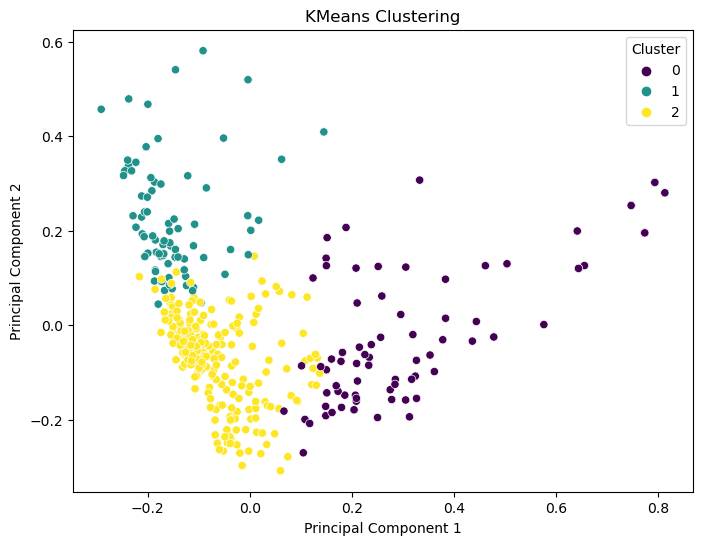

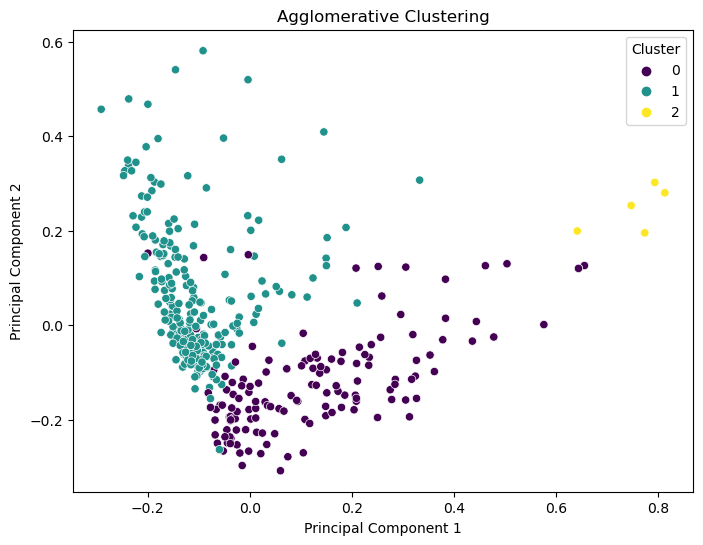

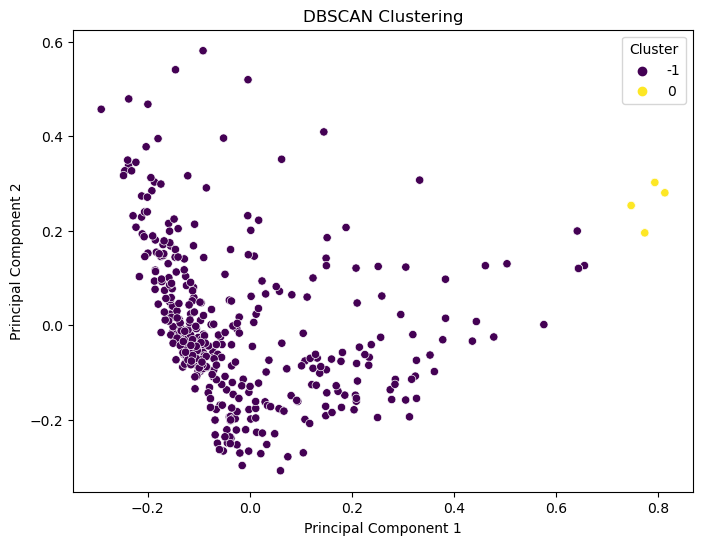

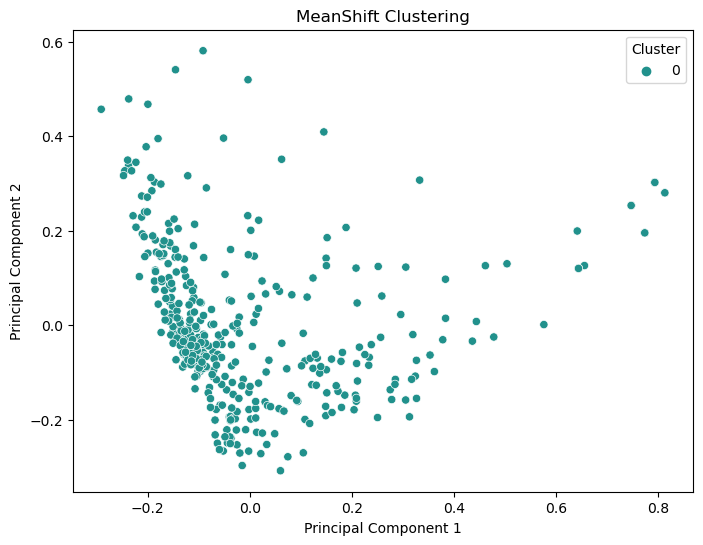

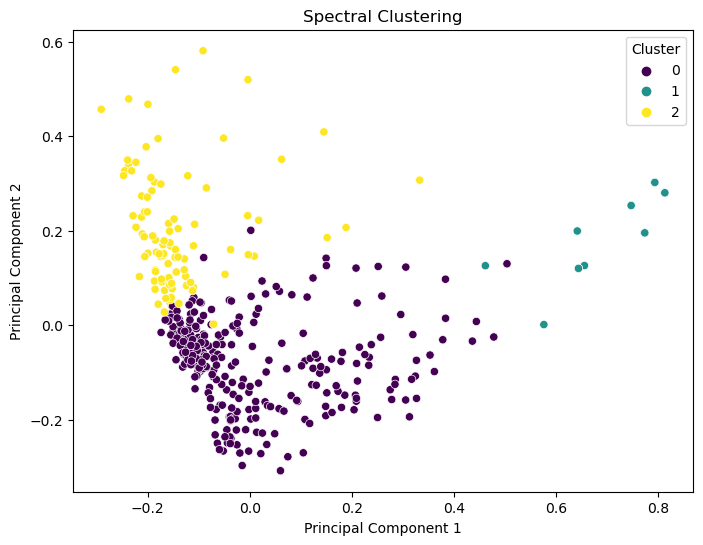

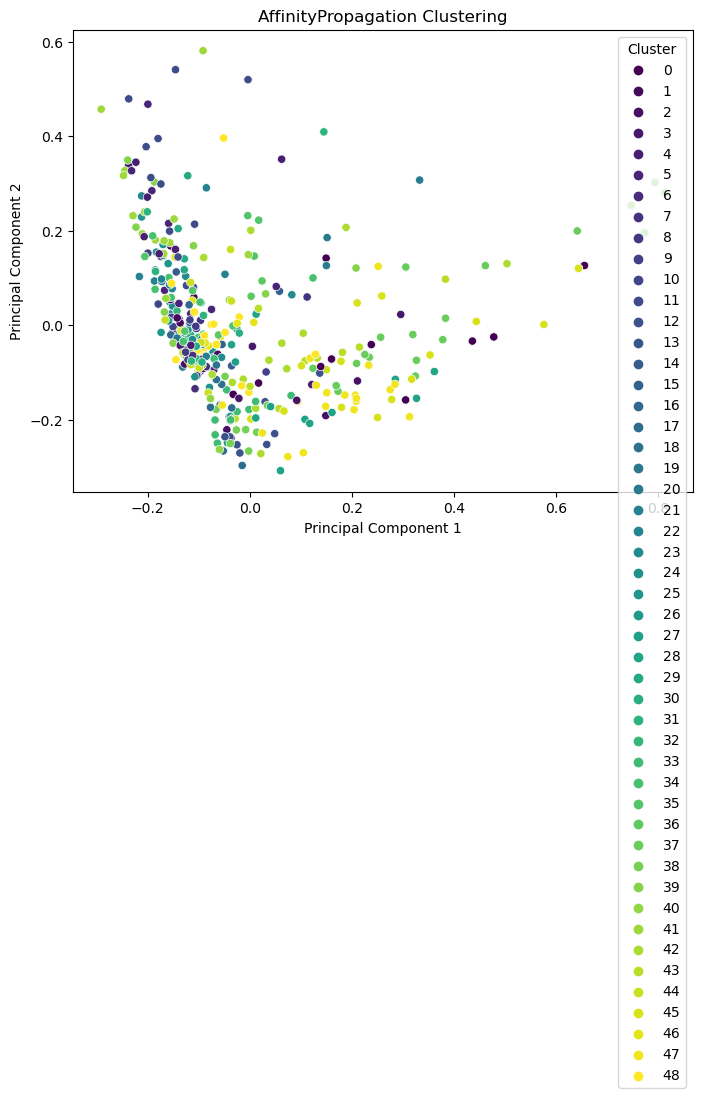

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.metrics import silhouette_score



# Preprocess your text data
text_data = finalData['ContractionReview']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Convert sparse matrix to dense numpy array
tfidf_matrix_dense = tfidf_matrix.toarray()

# Apply PCA to reduce dimensionality to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_dense)

# Dictionary to store clustering algorithms
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "MeanShift": MeanShift(),
    "Spectral": SpectralClustering(n_clusters=3),
    "AffinityPropagation": AffinityPropagation()
}

# Create scatter plots for each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    algorithm.fit(tfidf_matrix_dense)
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(tfidf_matrix_dense)
    
    # Create DataFrame for plotting
    df = pd.DataFrame({'PCA1': pca_result[:, 0], 'PCA2': pca_result[:, 1], 'Cluster': labels})
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', legend='full')
    plt.title(f'{name} Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


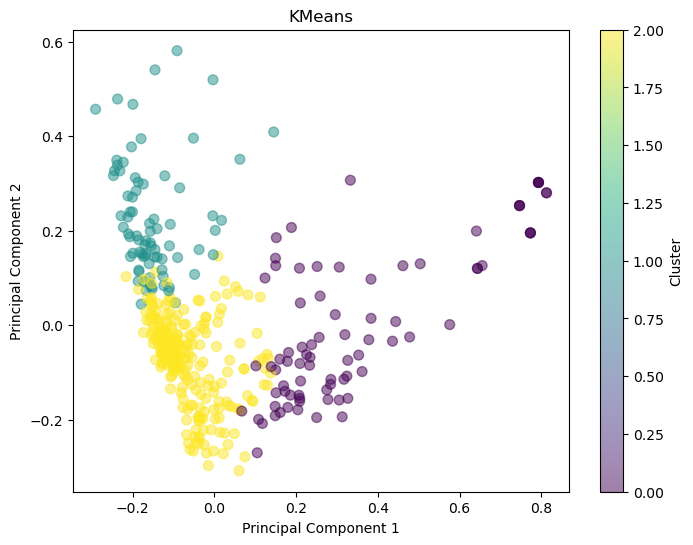

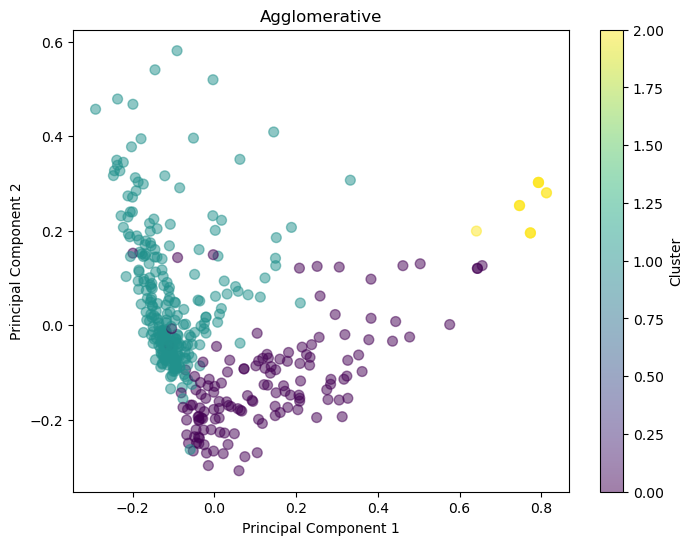

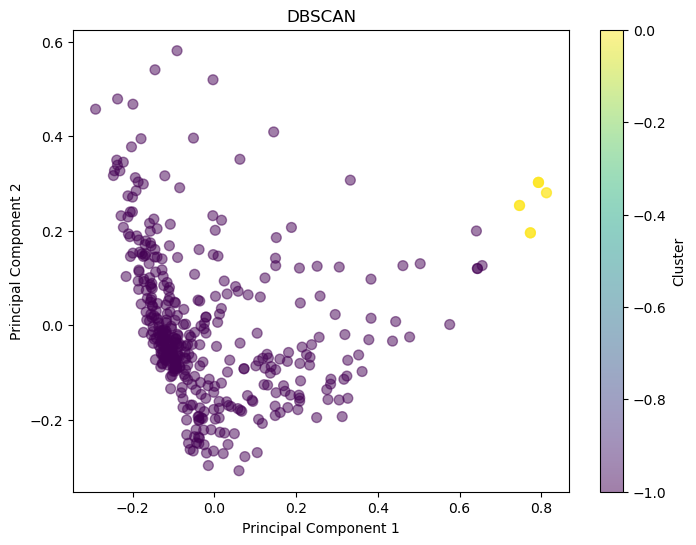

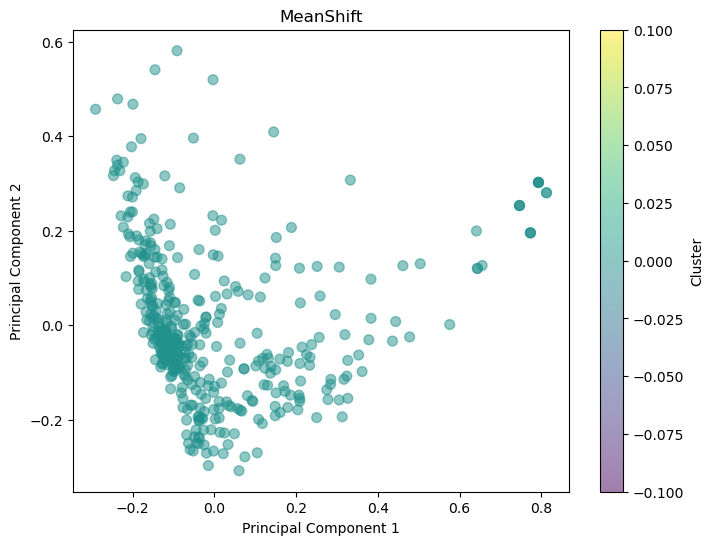

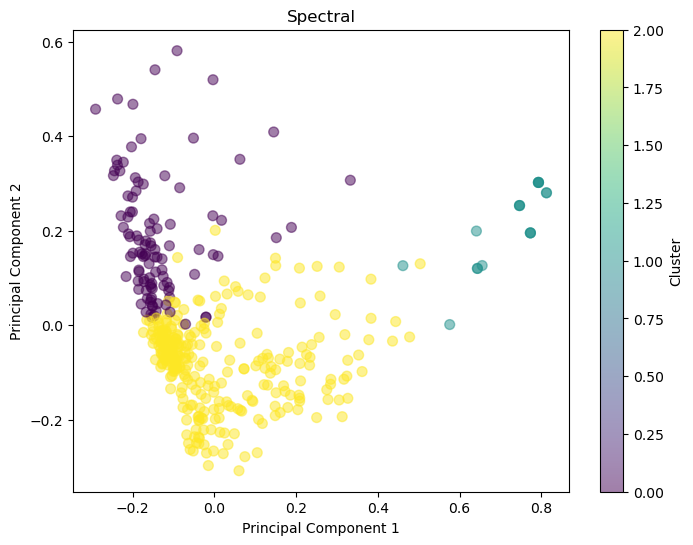

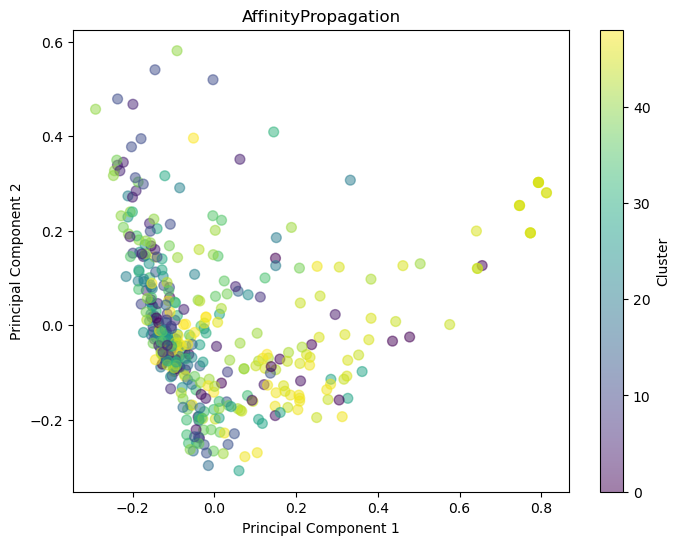

In [180]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function to plot scatter plot for a clustering algorithm
def plot_clusters(algorithm, title):
    # Fit the algorithm and obtain cluster labels
    algorithm.fit(tfidf_matrix_dense)
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(tfidf_matrix_dense)
    
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_matrix_dense)
    
    # Plot the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Plot scatter plots for each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    plot_clusters(algorithm, title=name)
